{'ham', 'jer', 'din', 'hans', 'være', 'havde', 'ville', 'fra', 'dette', 'der', 'var', 'et', 'hos', 'ikke', 'sin', 'da', 'til', 'man', 'blev', 'sig', 'sine', 'også', 'hvis', 'noget', 'os', 'vor', 'mod', 'over', 'nogle', 'hvor', 'om', 'deres', 'nu', 'med', 'min', 'hende', 'kunne', 'mit', 'her', 'mine', 'denne', 'mange', 'de', 'hvad', 'vil', 'hun', 'meget', 'på', 'ind', 'ad', 'af', 'thi', 'under', 'dig', 'du', 'men', 'er', 'dog', 'jo', 'hendes', 'når', 'op', 'været', 'anden', 'ud', 'den', 'bliver', 'som', 'skulle', 'mig', 'blive', 'dem', 'i', 'sit', 'have', 'det', 'og', 'har', 'alt', 'han', 'vi', 'alle', 'efter', 'jeg', 'en', 'skal', 'selv', 'for', 'ned', 'end', 'eller', 'at', 'sådan', 'disse'}


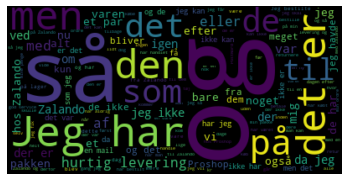

In [6]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#nltk.download('stopwords')


df = pd.read_csv("sklearn.csv")
x = df['review']

shortlisted_words=[]
words=x
stopwords = set(stopwords.words('danish'))

#Stopwords mangler
for w in words:
    if w not in stopwords:
        shortlisted_words.append(w)

# CONVERT LIST OF WORDS TO ONE LONG ASS SENTENCE
sentence = " ".join(shortlisted_words)

# CREATE NEW WORDCLOUD WITH NEW SENTENCE WITH REMOVED STOPWORDS
wordcloud = WordCloud().generate(sentence)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()